In [1]:
import pandas as pd
from utils.createCSV import createCSV
from matplotlib import pyplot as plt
from utils.dataloader import CustomImageDataset
import torchvision.transforms as transforms
from PIL import Image
import torch
from torchvision.transforms.autoaugment import AutoAugmentPolicy
from torch.utils.data import Dataset, DataLoader
import cv2
from utils.transformations import CustomTransformations

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
self.transformations = transforms.Compose([
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
            transforms.RandomChoice([
                transforms.RandomHorizontalFlip()
                transforms.RandomVerticalFlip()
                transforms.RandomResizedCrop(size=orSize,scale=(0.4,0.9))
                transforms.Compose([
                transforms.RandomResizedCrop(size=orSize//1.5,scale=(0.4,0.9)),
                transforms.Pad(int(size-(size//1.5)))
                ])
            ])
            transforms.Resize((size,size))
        ])

In [85]:
createCSV("../test","output.csv")

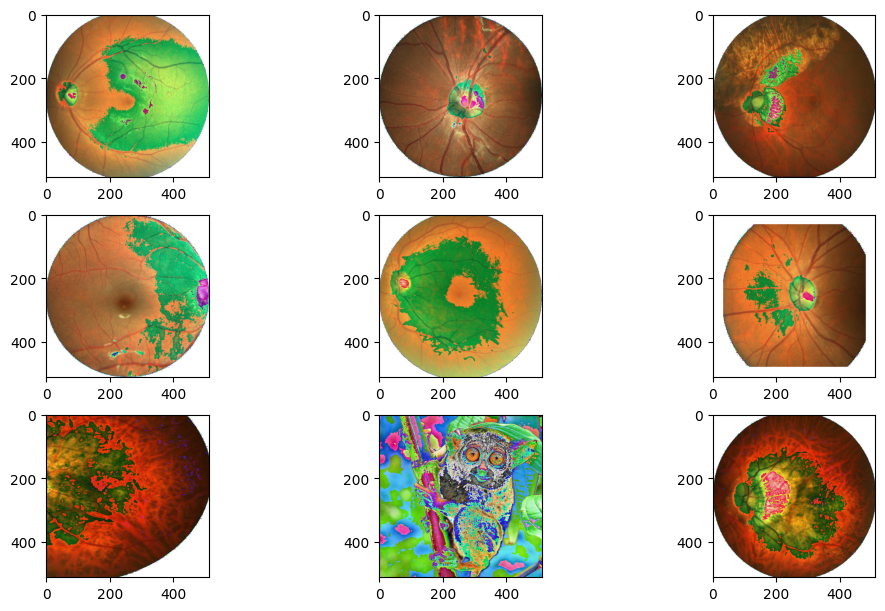

In [4]:
#TRANSFORMACIÓN REALIZADA CORRECTAMENTE
train_transforms = transforms.Compose([
    # transforms.Resize((512,512)),
    
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.8, 1.2)),
    #transforms.toTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
    
    
    transforms.RandomResizedCrop(size=512,scale=(0.4,0.9)),
    # transforms.Pad(100)
])
orSize = 1444
size = 512
train_transforms = transforms.Compose([
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            transforms.RandomChoice([
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.RandomResizedCrop(size=orSize,scale=(0.4,0.9)),
                transforms.Compose([
                transforms.RandomResizedCrop(size=orSize//1.5,scale=(0.4,0.9)),
                transforms.Pad(int(size-(size//1.5)),fill=255)
                ])
            ]),
            transforms.Resize((size,size))
        ])



dataset = CustomImageDataset(annotations_file = "./output.csv", img_dir = "../test/", num_clases=3, transform = CustomTransformations(512), target_transform=None)
dl = DataLoader(dataset,batch_size=1,shuffle=True)

fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True)
# for ax, markevery in zip(axs.flat, cases):
#     ax.set_title(f'markevery={markevery}')
#     ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)
i = 0    
for image, label in dl:
    # print(image.shape)
    # print(label.shape)
    img = image[0].permute(1,2,0).type(torch.uint8)
    axs[i%3,i//3].imshow(img)
    if i==9:
        break 
    else:
        i+=1
plt.show()   

In [8]:
dataset = CustomImageDataset(annotations_file = "./output.csv", img_dir = "../test/", num_clases=3, transform = CustomTransformations(512), target_transform=None)
dl = DataLoader(dataset,batch_size=1,shuffle=True)

In [9]:
for image, label in dl:
    break

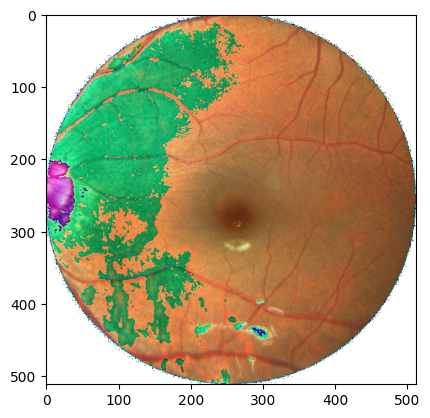

In [10]:
img = image[0].permute(1,2,0).type(torch.uint8)
plt.imshow(img)